---
title: Practice_Activity_9.1 Decision Boundaries
author: Sneha Narayanan
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
theme: "Lumen"

---

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from plotnine import ggplot, aes, geom_point, geom_line, labs, scale_color_manual, theme, scale_linetype_manual,element_text

In [ ]:
data = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')

In [ ]:
data.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [ ]:
data.isnull().sum()

,0
Name,0
age,0
sex,0
cp,0
trtbps,0
chol,0
restecg,0
thalach,0
diagnosis,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       204 non-null    object
 1   age        204 non-null    int64 
 2   sex        204 non-null    int64 
 3   cp         204 non-null    int64 
 4   trtbps     204 non-null    int64 
 5   chol       204 non-null    int64 
 6   restecg    204 non-null    int64 
 7   thalach    204 non-null    int64 
 8   diagnosis  204 non-null    object
dtypes: int64(7), object(2)
memory usage: 14.5+ KB


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
X= data[['age','chol']]

In [ ]:
data['diagnosis_encoded'] = LabelEncoder().fit_transform(data['diagnosis'])

In [ ]:
y = data['diagnosis_encoded']

In [ ]:
lr = LogisticRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
coef = lr.coef_[0]
intercept = lr.intercept_[0]

In [ ]:
print(f'Intercept: {intercept}')
print(f'Coefficient for Age: {coef}')
print(f'Coefficient for Chol: {coef}')

Intercept: -3.3352343331261265
Coefficient for Age: [0.04477063 0.00283207]
Coefficient for Chol: [0.04477063 0.00283207]


In [ ]:
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.5610


In [ ]:
age = 55
prob_threshold = 0.5


chol_threshold = (np.log(prob_threshold / (1 - prob_threshold)) - intercept - coef[0] * age) / coef[1]

chol_threshold

308.2018987238324

In [ ]:
prob_thresh_90 = 0.9

chol_thresh_90 = (np.log(prob_thresh_90 / (1 - prob_thresh_90)) - intercept - coef[0] * age) / coef[1]

chol_thresh_90

1084.038329697272

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda_coef = lda.coef_[0]
lda_intercept = lda.intercept_[0]

chol_lda_thresh = -(lda_intercept + lda_coef[0] * age) / lda_coef[1]

chol_lda_thresh

310.01184093699123

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
svc_coef = svc.coef_[0]
svc_intercept = svc.intercept_[0]

In [ ]:
age = 55
chol_svc_threshold = -(svc_intercept + svc_coef[0] * age) / svc_coef[1]

chol_svc_threshold

286.6092854769155

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

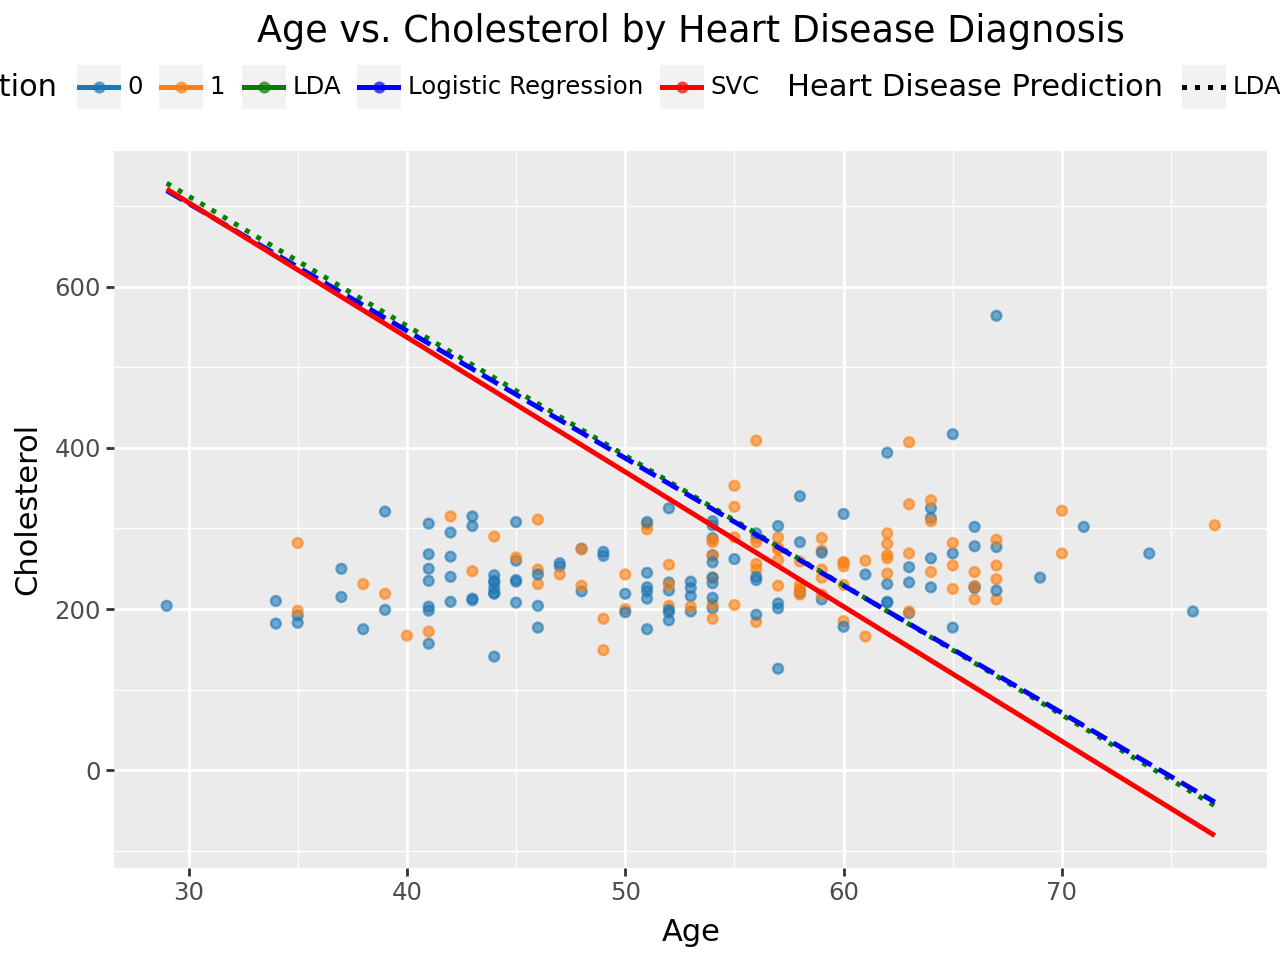

In [ ]:
x_vals = np.linspace(data['age'].min(), data['age'].max(), 100)

y_vals_lr = -(intercept + coef[0] * x_vals) / coef[1]
df_lr = pd.DataFrame({'age': x_vals, 'chol': y_vals_lr, 'model': 'Logistic Regression'})

y_vals_lda = -(lda_intercept + lda_coef[0] * x_vals) / lda_coef[1]
df_lda = pd.DataFrame({'age': x_vals, 'chol': y_vals_lda, 'model': 'LDA'})

y_vals_svc = -(svc_intercept + svc_coef[0] * x_vals) / svc_coef[1]
df_svc = pd.DataFrame({'age': x_vals, 'chol': y_vals_svc, 'model': 'SVC'})

df_boundaries = pd.concat([df_lr, df_lda, df_svc])

plot = (ggplot(data, aes(x='age', y='chol', color='factor(diagnosis_encoded)'))
        + geom_point(alpha=0.6)
        + geom_line(aes(x='age', y='chol', color='model', linetype='model'), data=df_boundaries, size=1)
        + labs(title='Age vs. Cholesterol by Heart Disease Diagnosis', x='Age', y='Cholesterol', color='Diagnosis')
        + scale_color_manual(values=['#1f77b4', '#ff7f0e', 'green', 'blue', 'red'])
        + scale_linetype_manual(values={'Logistic Regression': 'dashed', 'LDA': 'dotted', 'SVC': 'solid'})
        + theme(legend_title=element_text(text='Heart Disease Prediction'),
                legend_position='top')
)
plot.show()

> Logistic Regression and SVC: These models seem to have similar predictions, with the decision boundary being relatively close to each other. They both suggest that individuals with higher cholesterol levels and younger age are more likely to be predicted as having heart disease.

> LDA: The LDA model has a slightly different decision boundary, suggesting a slightly different prediction pattern.